In [74]:
import heraldo_core as he
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp

In [75]:
cd ~/ownCloud/HERALDO_01_18/normal_incidence_hysteresis/

/Users/Angus_Laurenson/ownCloud/HERALDO_01_18/normal_incidence_hysteresis


In [76]:
ls

038.png                      scan_045.nxs*
040.png                      scan_046.nxs*
042.png                      scan_047.nxs*
044.png                      scan_048.nxs*
046.png                      scan_049.nxs*
048.png                      scan_050.nxs*
050.png                      scan_051.nxs*
052.png                      scan_052.nxs*
054.png                      scan_053.nxs*
056.png                      scan_054.nxs*
058.png                      scan_055.nxs*
060.png                      scan_056.nxs*
062.png                      scan_057.nxs*
063.png                      scan_058.nxs*
064.png                      scan_059.nxs*
066.png                      scan_060.nxs*
068.png                      scan_061.nxs*
070.png                      scan_062.nxs*
072.png                      scan_063.nxs*
074.png                      scan_064.nxs*
076.png                      scan_065.nxs*
078.png                      scan_066.nxs*
080.png                      scan_067.nxs*
082.png    

In [55]:
data = he.reconstruct('','scan_058.nxs','scan_059.nxs', 5)

<IPython.core.display.Javascript object>


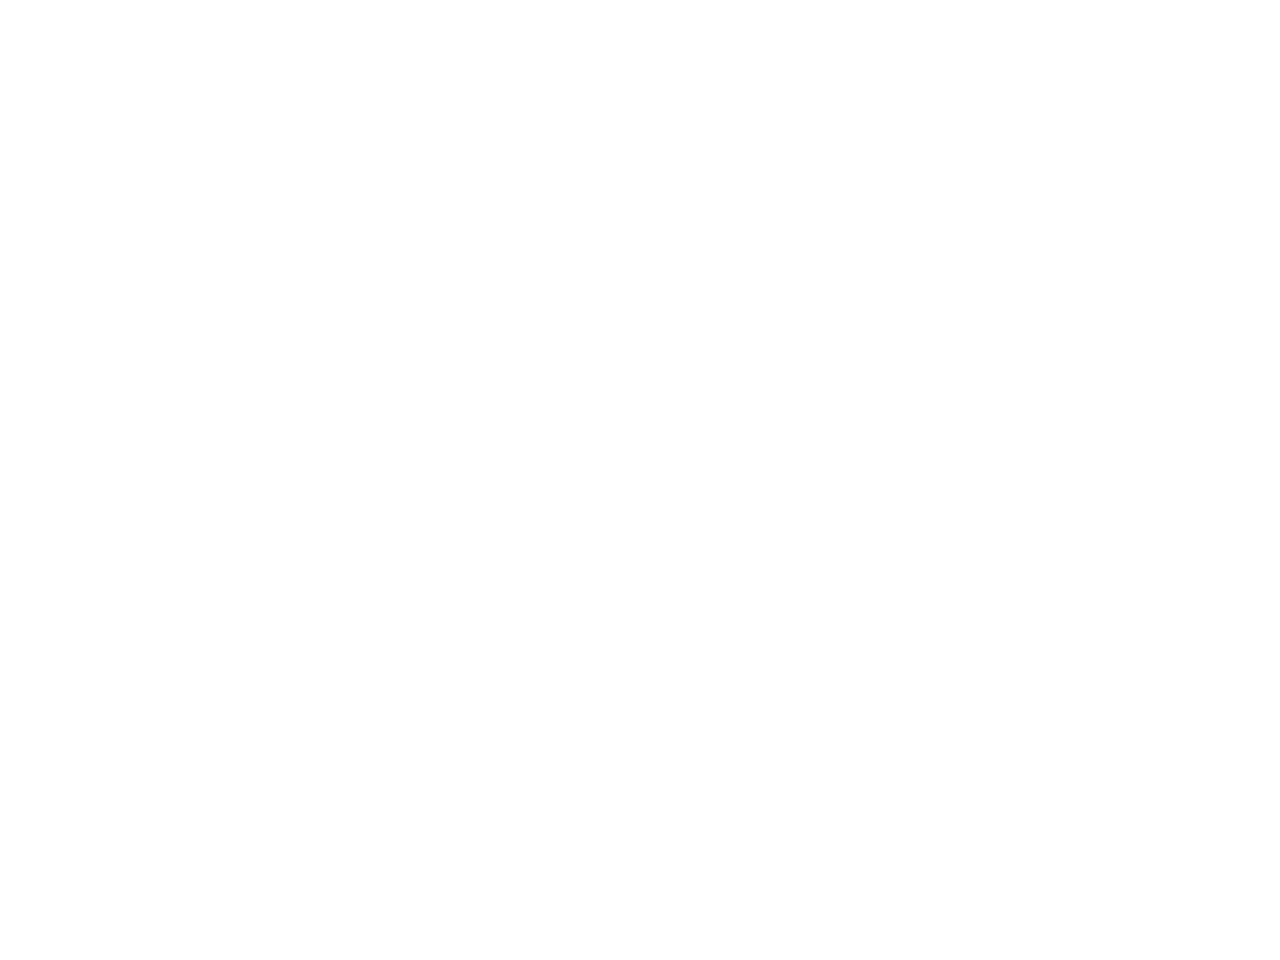

In [56]:
%matplotlib notebook
plt.figure()
plt.imshow(data.real,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma'
          )
plt.show()

# hot pixel detection

Will try to use a local gradient detection filter to find pixels of abnormal intensity, then use a median filter in the local vicininty to smooth away the hot pixel.

In [79]:
raw_1 = he.load_nxs_data('/Users/Angus_Laurenson/ownCloud/HERALDO_01_18/biskyrmions/','scan_158.nxs','scanx_158','data_03')
raw_2 = he.load_nxs_data('/Users/Angus_Laurenson/ownCloud/HERALDO_01_18/biskyrmions/','scan_159.nxs','scanx_159','data_03')
sum_data = raw_1 + raw_2

(2, 5)


<IPython.core.display.Javascript object>


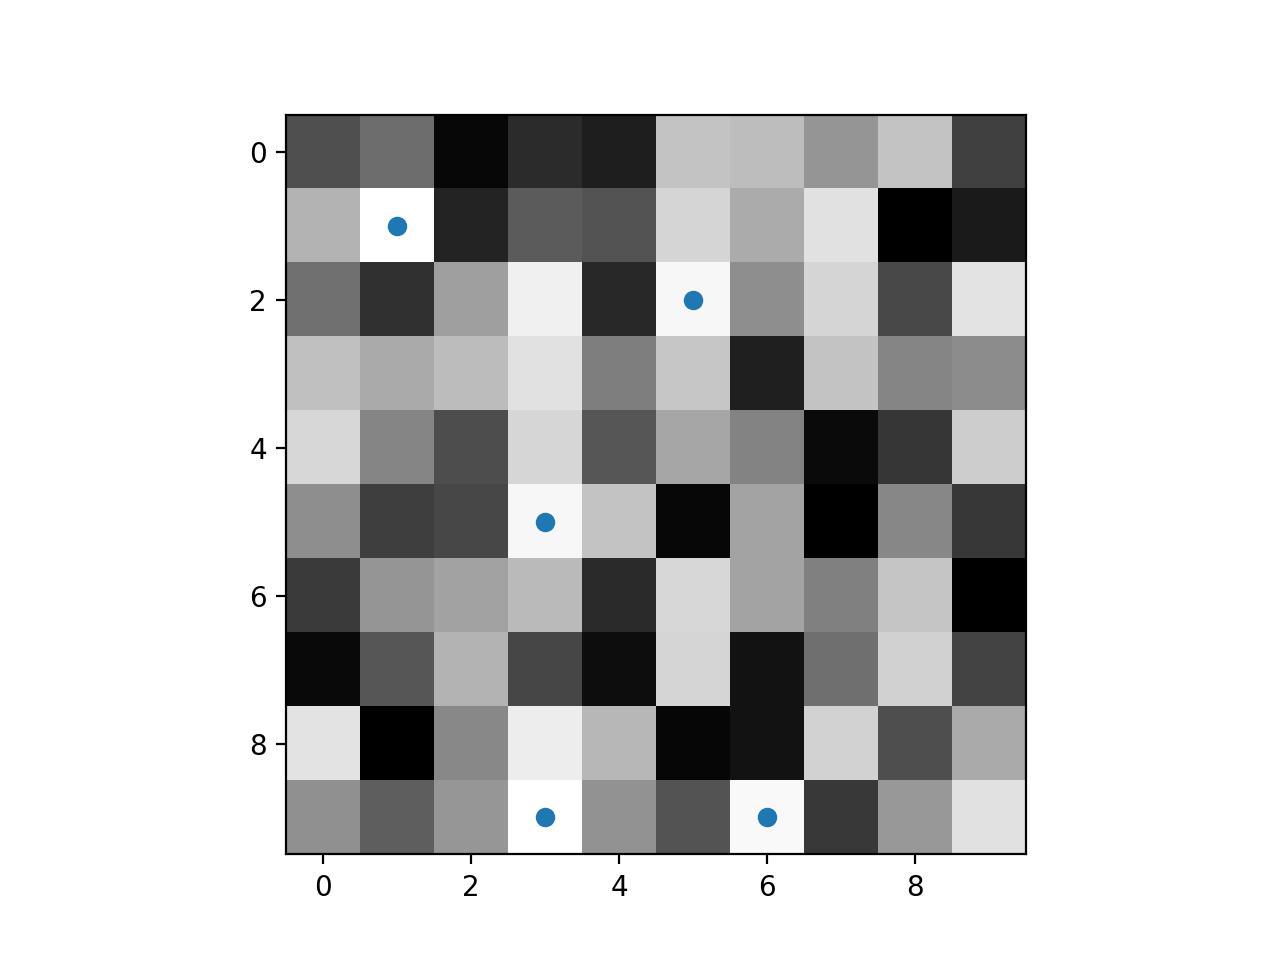

In [78]:
# get the maximum value in an array
test_array = sp.rand(10,10)
# get the locations of top 5
locs = sp.array(sp.unravel_index(test_array.argsort(axis=None)[-5::], test_array.shape, order='F'))
print(locs.shape)
plt.figure()
plt.imshow(test_array)
plt.scatter(*locs[:,:])
plt.show()

<IPython.core.display.Javascript object>


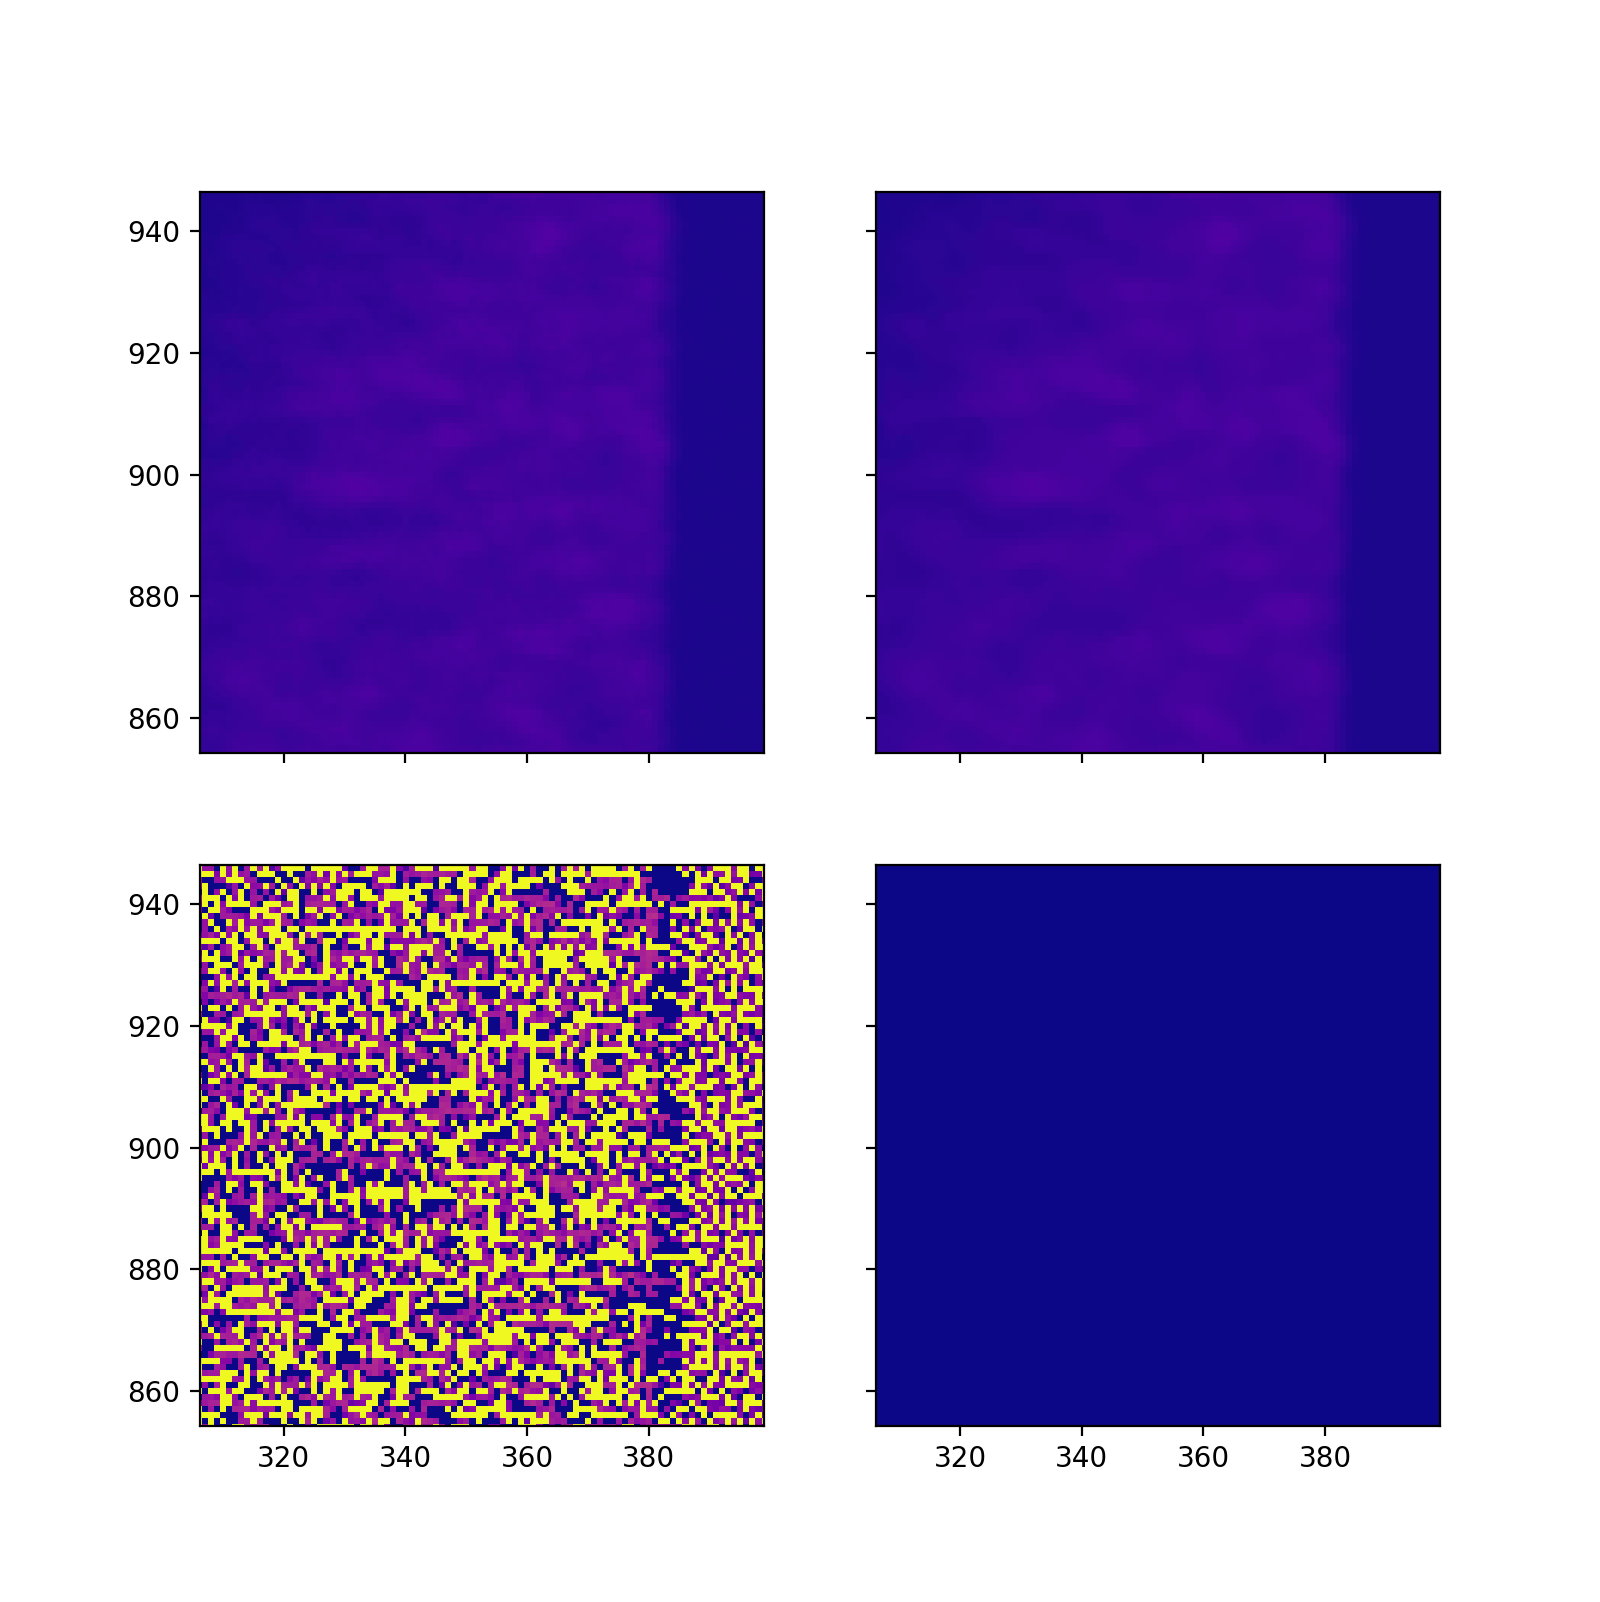

In [69]:
# median filter approach
from skimage.morphology import square
from skimage import feature


filtered = sp.ndimage.median_filter(raw_1, 3)

f, ax = plt.subplots(2,2, figsize = (8,8), sharex=True, sharey=True)
ax[0,0].imshow(raw_1,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma',
           interpolation='none'
          )    
ax[0,1].imshow(filtered,
           norm=colors.LogNorm(),
           origin='lower',
           cmap = 'plasma',
           interpolation='none'
          )
ax[1,0].imshow(raw_1-filtered,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma',
           interpolation='none'
          )

edges = feature.canny(raw_1-filtered, 5)


ax[1,1].imshow(edges,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma',
           interpolation='none'
          )
plt.show()

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(1147, 944)


<IPython.core.display.Javascript object>


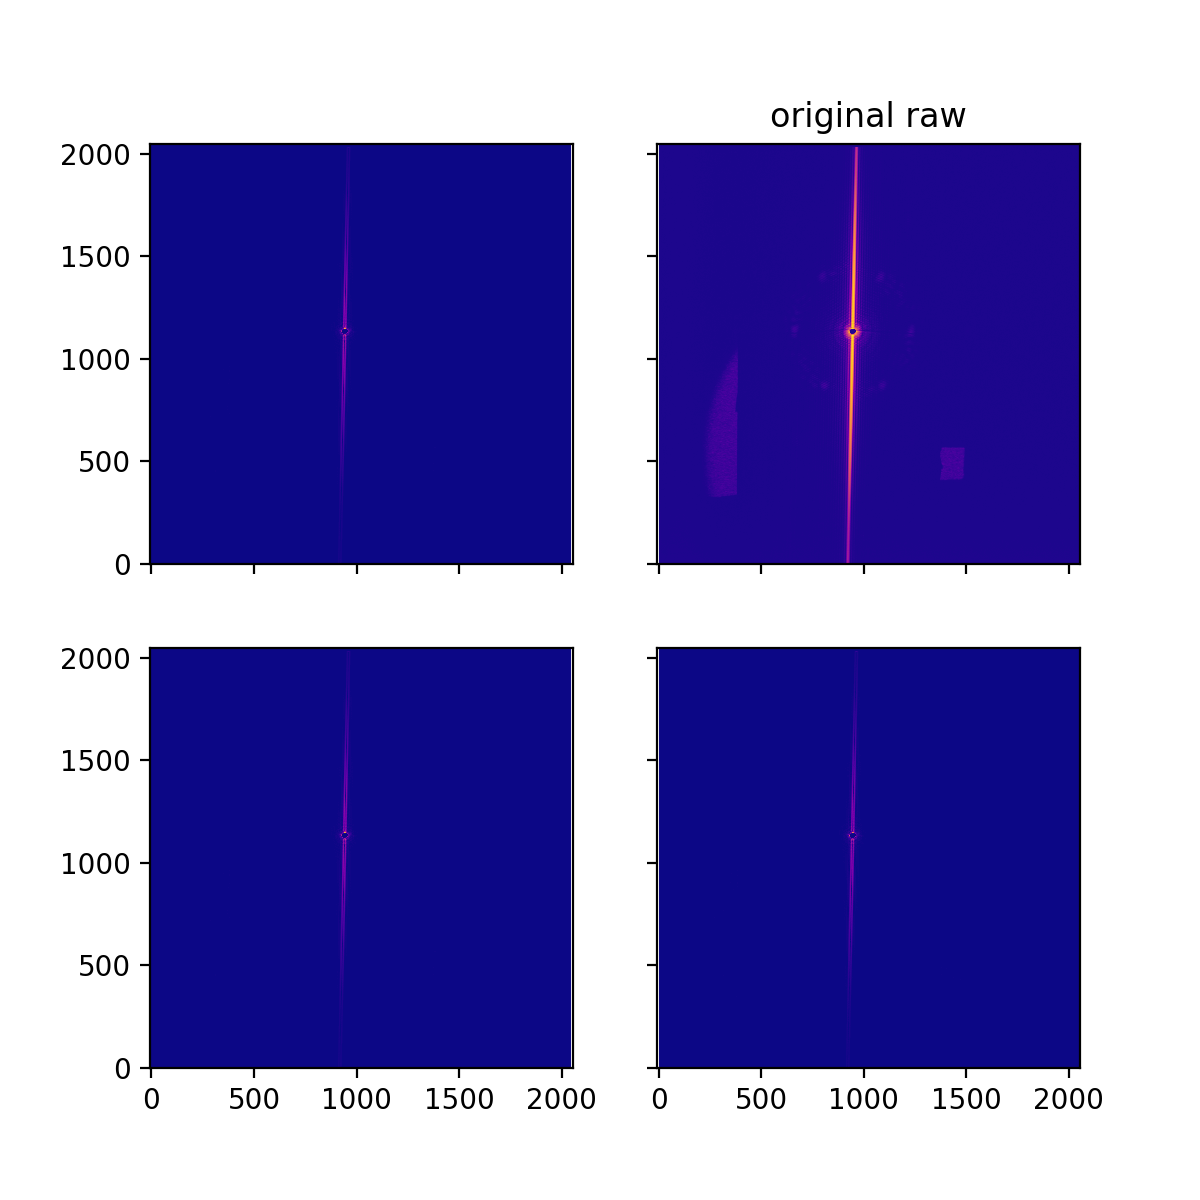

In [80]:
# apply various filters
sobel_1 = filters.sobel(raw_1)
median_1 = filters.median(raw_1)
scharr_1 = filters.scharr(raw_1)
roberts_1 = filters.roberts(raw_1)

# get the maximum positions
sobel_max_index = sp.unravel_index(sobel_1.argmax(), sobel_1.shape)
print(sobel_max_index)

f, ax = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)


ax[0,0].imshow(sobel_1,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma'
          )
# ax[0,0].scatter(, marker='x', color='red')
ax[0,1].set_title('original raw')
ax[0,1].imshow(raw_1,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma',
           interpolation = 'none'
          )
ax[1,0].imshow(scharr_1,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma'
          )
ax[1,1].imshow(roberts_1,
           norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03),
           origin='lower',
           cmap = 'plasma'
          )
plt.show()



# PIL save png output

In [ ]:
from PIL import Image
from matplotlib import cm
data = he.reconstruct('/Users/Angus_Laurenson/ownCloud/HERALDO_09_17/Polarity Switching/','scan_043.nxs','scan_044.nxs', 5)
# normalise image
data = sp.angle(data)/sp.amax(sp.angle(data))
im = Image.fromarray(sp.uint8(cm.hsv(data[800:1250,650:1400])*255))
im.save('test.png')

In [81]:
import heraldo_core_oop as hp

In [82]:
cali = hp.callibration()

In [49]:
%matplotlib inline
cali.manual_origin(sum_data)

NameError: name 'callibration' is not defined

<IPython.core.display.Javascript object>


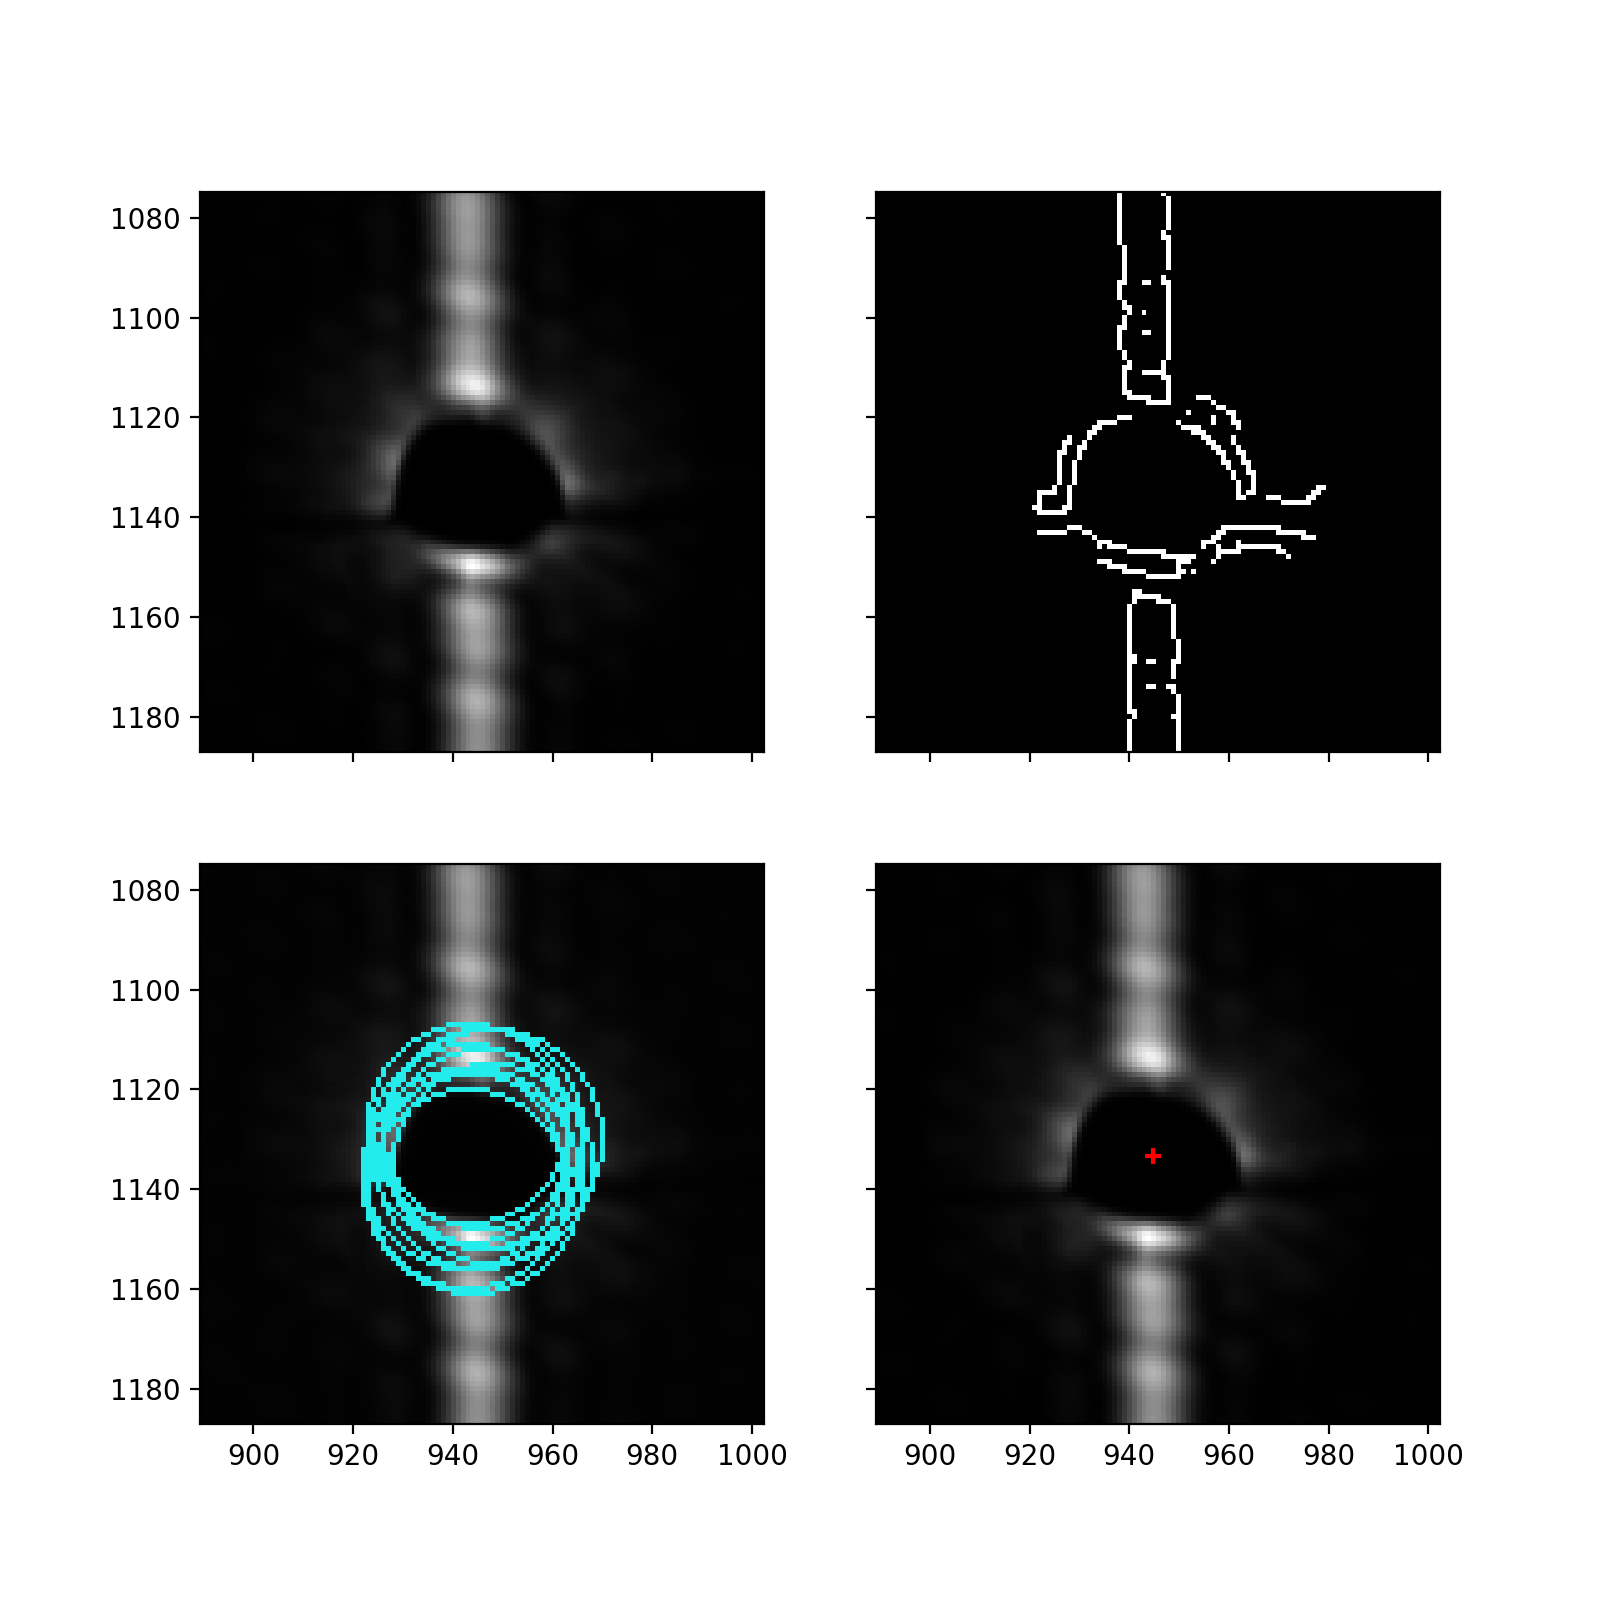

In [83]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = sum_data/sp.amax(sum_data)
edges = canny(image, sigma=0)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent N circles
N = 10
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=N)

# Draw them
x=0;y=0;
fig, ax = plt.subplots(2,2, figsize=(8, 8), sharex=True, sharey=True)
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
#     ax[1,1].scatter(*(center_x,center_y), marker='x')
    x = x + center_x; y = y + center_y
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)
ax[0,0].imshow(sum_data)
ax[0,1].imshow(edges)
ax[1,0].imshow(image, cmap=plt.cm.gray)
ax[1,1].imshow(sum_data)
ax[1,1].scatter(x/N,y/N, marker='+', color='red')


plt.show()

<IPython.core.display.Javascript object>


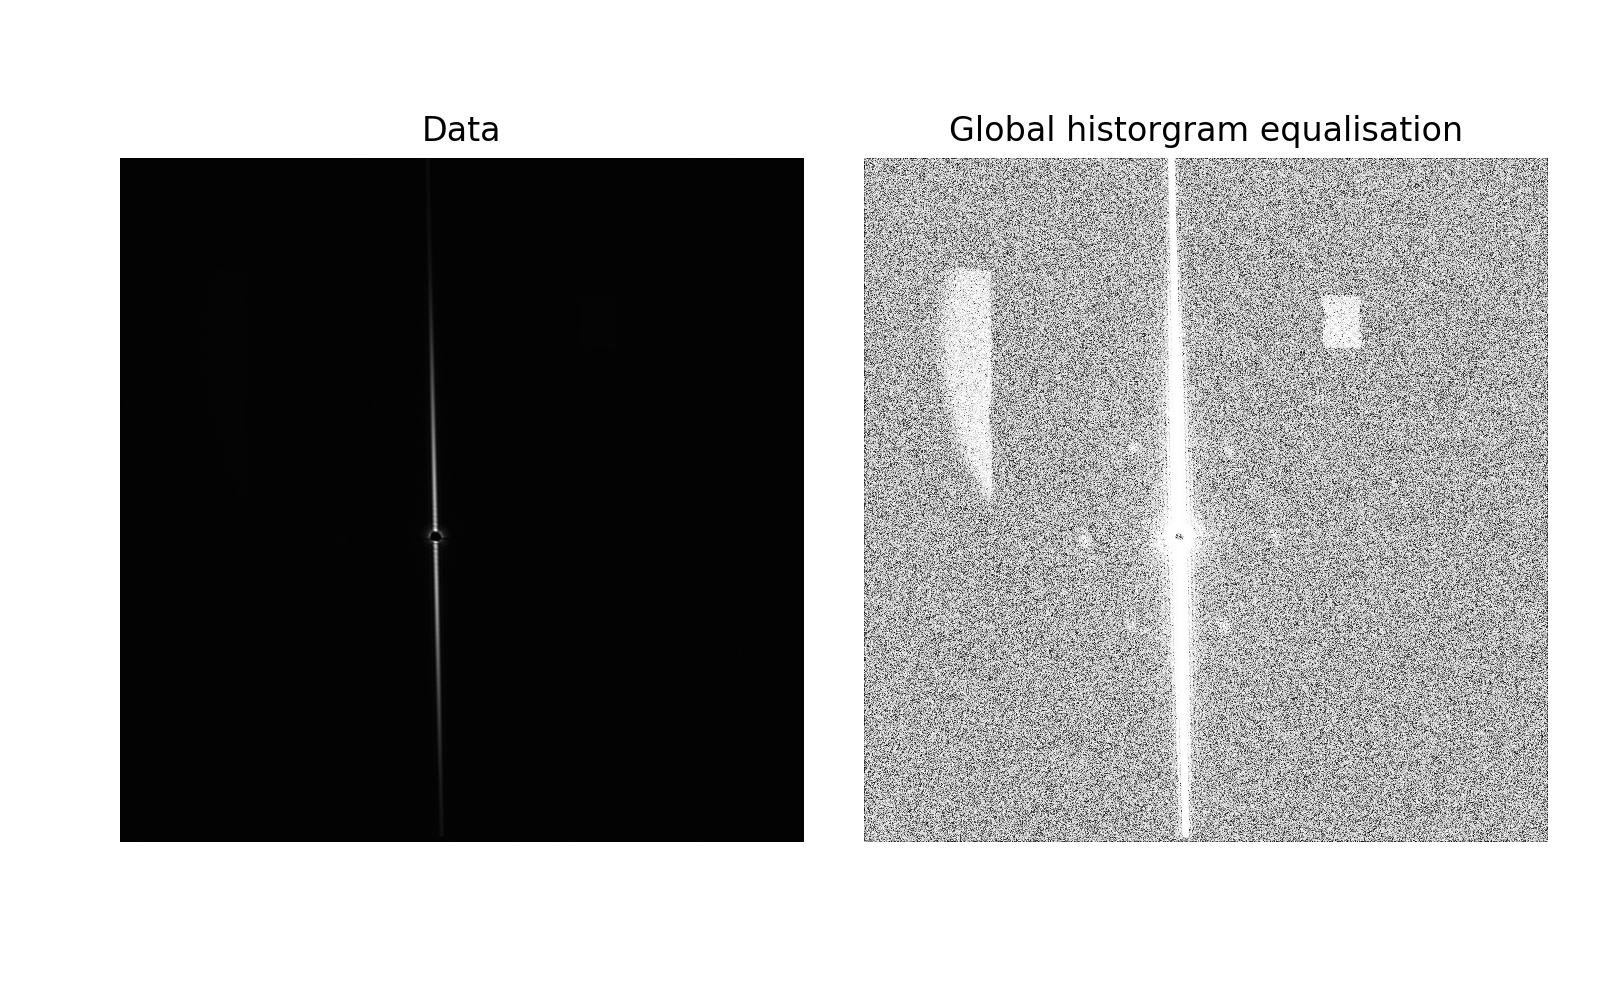

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration, exposure

astro = color.rgb2gray(data.astronaut())
astro = color.rgb2gray(raw_1)

from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True,
                       subplot_kw={'adjustable': 'box-forced'})

plt.gray()

ax[0].imshow(astro)
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(exposure.equalize_hist(astro))
ax[1].axis('off')
ax[1].set_title('Global historgram equalisation')

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


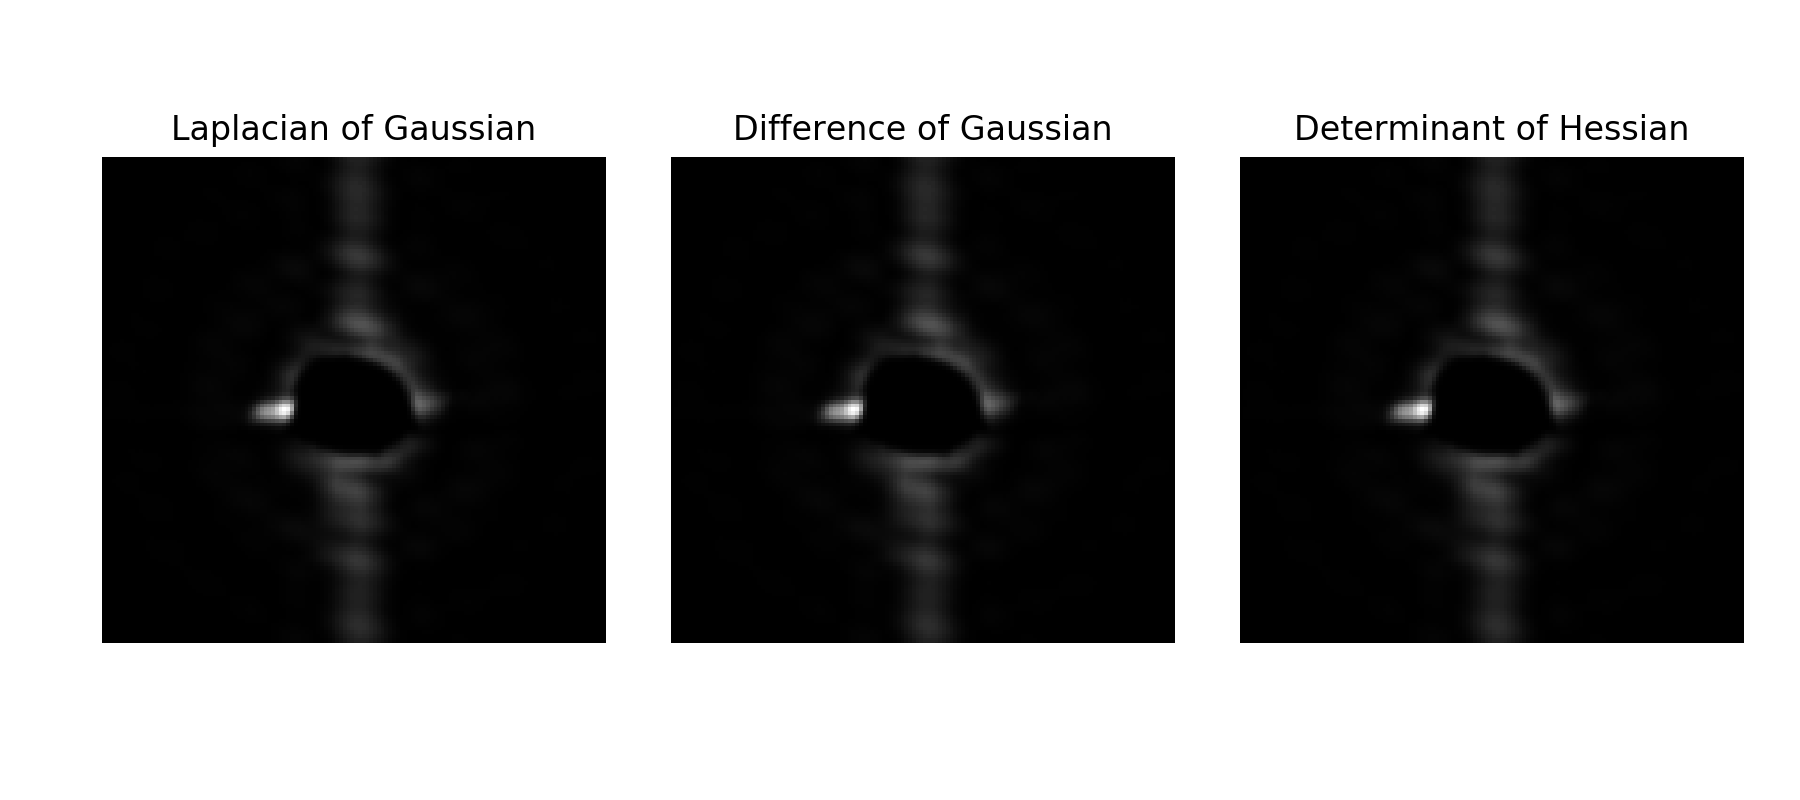

In [38]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

%matplotlib notebook
# image = data.hubble_deep_field()[0:500, 0:500]
image = raw_1[800:1200,800:1200]
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, min_sigma=0, max_sigma=5, num_sigma=10, threshold=sp.amax(image_gray)*0.9)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=sp.mean(image_gray))
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1,3, figsize=(9, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()